## Practical Implementation of SVR(support vector regression to predict Admission)


Steps followed
1. EDA
2. Feature Engineering
3. Model Training
4. Prediction

In [1]:
#comment or observation

In [2]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading datasets
data = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [4]:
data.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [5]:
#basic info of the data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.shape

(500, 9)

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
columns = [i.strip() for i in data.columns]
data.columns = columns

In [9]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
#checking unique values in data
data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [11]:
#checking null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
## data set has no null values

In [13]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


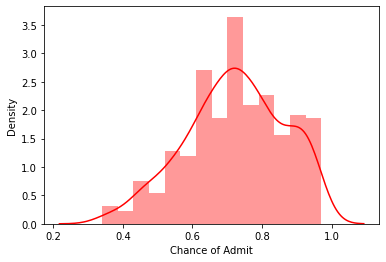

In [15]:
sns.distplot(data['Chance of Admit'],kde = True, color = 'r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


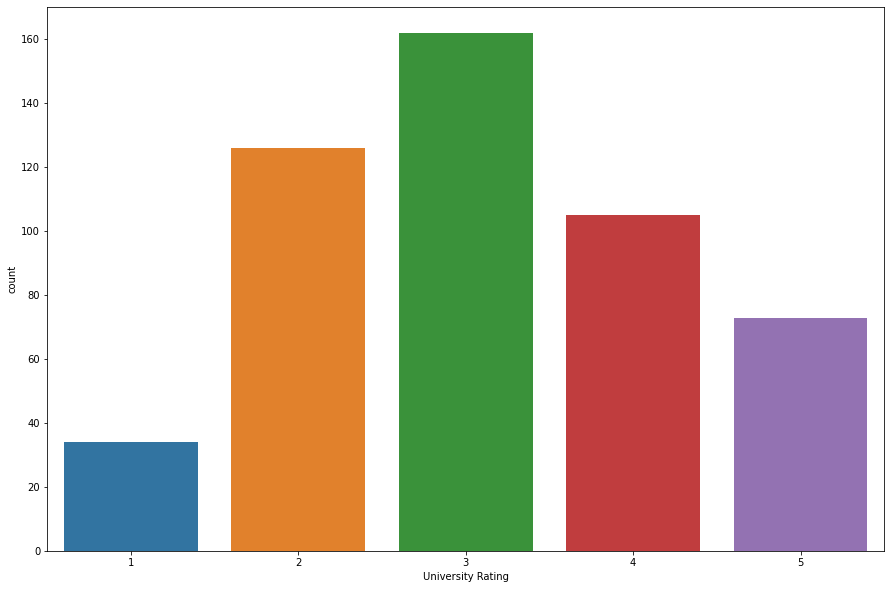

In [30]:
plt.figure(figsize = (15,10))
sns.countplot(data['University Rating'])

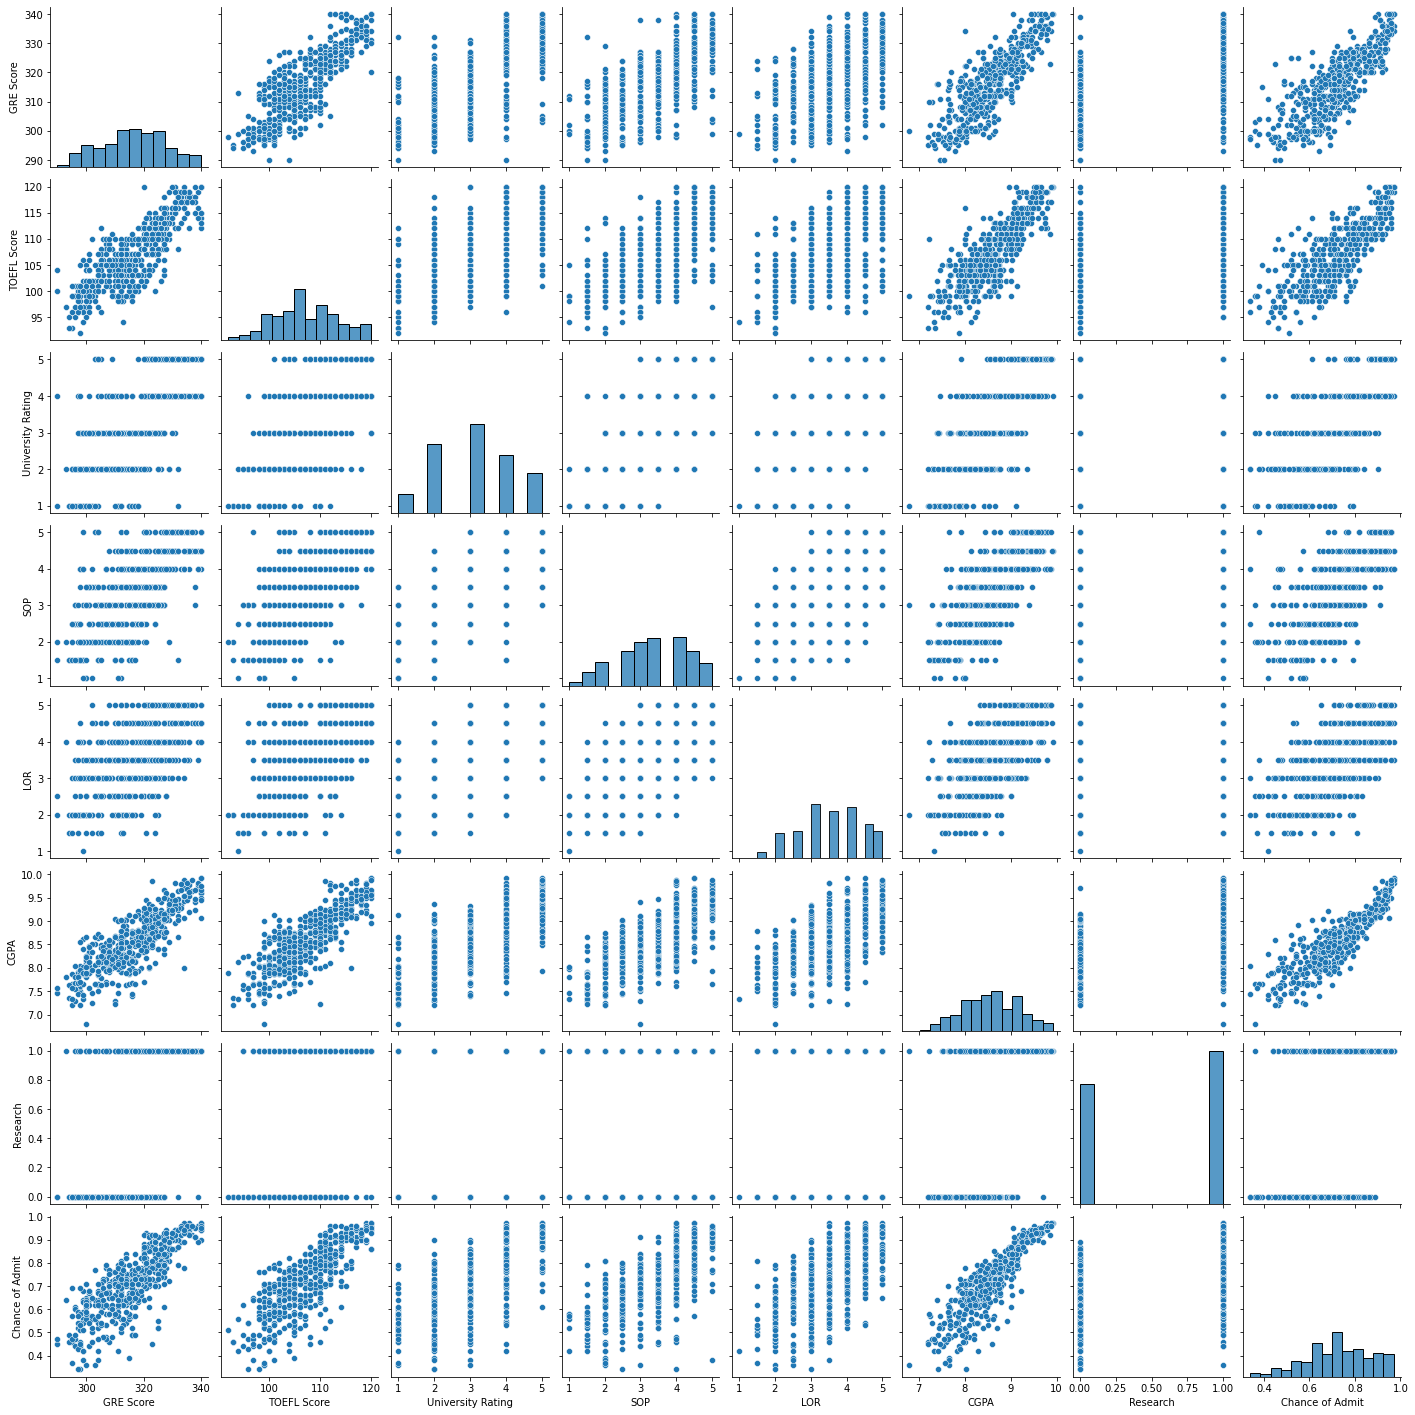

In [31]:
sns.pairplot(data)

In [16]:
## data set is slightly skewed 

In [17]:
#checking corelation 
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


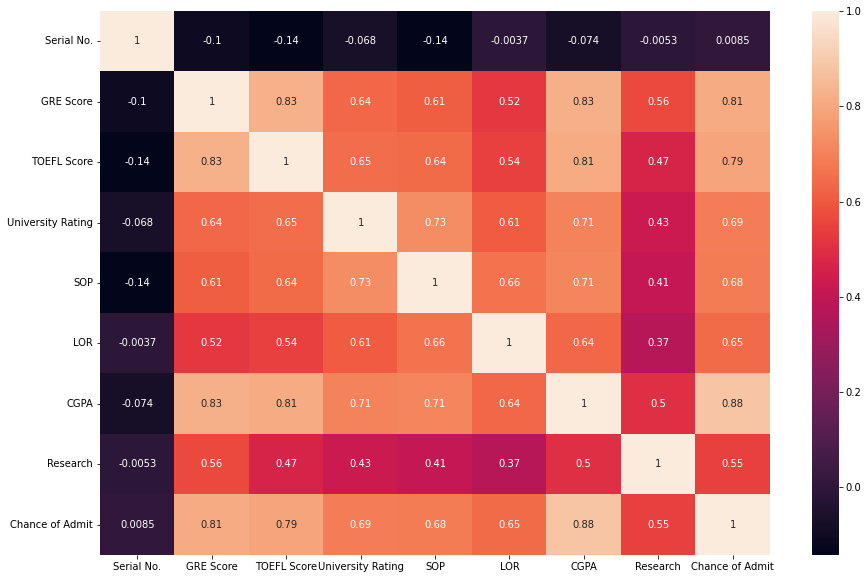

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot=True)

In [19]:
## we can see average corelation between chance of admit and all other features

In [20]:
data.drop('Serial No.',axis = 1 ,inplace = True)

In [21]:
data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [22]:
#seggregating target and independent features
X = data.drop('Chance of Admit',axis =1)
Y = data['Chance of Admit']

In [44]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

In [46]:
print(X_train.shape)
print(X_test.shape)

(350, 7)
(150, 7)


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
scaler

StandardScaler()

In [49]:
scaler.fit(X_train)

StandardScaler()

In [50]:
X_train_tf = scaler.transform(X_train)

In [51]:
X_train_tf

array([[ 1.40970404,  2.0128976 ,  0.78254647, ...,  1.08852154,
         1.11624996,  0.89672945],
       [ 1.67843848,  1.67621222,  1.65759842, ...,  1.62815686,
         2.08366978,  0.89672945],
       [-0.65059326, -1.35395621, -0.09250549, ...,  0.54888622,
        -0.01796637, -1.11516355],
       ...,
       [-0.91932769, -0.34390007, -0.96755745, ..., -1.07001976,
        -0.51835593, -1.11516355],
       [ 1.3201259 ,  1.50786953,  0.78254647, ...,  1.08852154,
         1.449843  ,  0.89672945],
       [ 0.60350075, -0.00721469,  0.78254647, ..., -1.07001976,
        -0.15140358,  0.89672945]])

In [56]:
scaler.fit(X_test)

StandardScaler()

In [57]:
X_test_tf = scaler.transform(X_test)

In [58]:
from sklearn.svm import SVR
model = SVR()

In [59]:
model

SVR()

In [60]:
model.fit(X_train_tf,Y_train)

SVR()

In [61]:
Y_predict = model.predict(X_test_tf)

In [62]:
Y_predict

array([0.55001383, 0.60441233, 0.53491314, 0.61394528, 0.85148674,
       0.85821114, 0.72433457, 0.64930772, 0.73195026, 0.73677003,
       0.43676511, 0.49988953, 0.62040643, 0.85678317, 0.53116321,
       0.67848994, 0.59303302, 0.61372807, 0.58052902, 0.84307217,
       0.61077898, 0.69943881, 0.69910341, 0.63958259, 0.47206918,
       0.42479598, 0.69572333, 0.63567437, 0.78769614, 0.88333877,
       0.79402338, 0.52342985, 0.86979622, 0.68588329, 0.84388935,
       0.76068609, 0.71058022, 0.73076023, 0.8768539 , 0.71437469,
       0.66508926, 0.60530518, 0.70966897, 0.6546079 , 0.73877206,
       0.56602687, 0.64876307, 0.88464063, 0.47564026, 0.58596732,
       0.63071541, 0.87998007, 0.81126492, 0.60260044, 0.60306076,
       0.61060987, 0.77495389, 0.76543694, 0.75722019, 0.55192823,
       0.65808328, 0.52092967, 0.87038986, 0.85244352, 0.63180694,
       0.86751003, 0.78851477, 0.54251279, 0.73865839, 0.50815497,
       0.596841  , 0.47591718, 0.68683704, 0.80230451, 0.56914

In [69]:
from sklearn.metrics import r2_score

In [70]:
score = r2_score(Y_test,Y_predict)
score

0.6970241312654843

## Model is able predict correctly  with 70% accuracy
## model is predict without any kernel
## we can increase accuracy with hyperparameter tuning